# 0 - Informations

# 1 - Packages

In [39]:
# Math packages
import numpy as np

# Initialisation of the seed
np.random.seed(42)

# Graphic packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Sklearn packages
from sklearn.decomposition import PCA

# Plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go

# Widgets
from IPython.html.widgets  import widgets, interact
import colorlover as cl

# Import progress bar
from tqdm import tqdm

# Exercice 1: Observations Préliminaires

## 1.1 - Représentation de $ \frac{1}{\sqrt{n}} B$

In [2]:
def generateAffectations(n=20, K=3, return_affectations=False):
    """Affectation of the n q_i by returning J."""
    
    # resulting array
    J = np.zeros((n, K))
        
    # Choose a class for each 
    classes = np.sort(np.random.randint(0, K, size=n))
    
    # Loop over each examples
    for i in range(n):
        
        # Update J
        J[i, :] = [int(classes[i] == k) for k in range(K)]
    
    if return_affectations:
        return np.array(J), classes
    
    else:
        return np.array(J)

In [3]:
def generateQ(q_0, n=20, mode="constant", sigma=0.25):
    """Generate random q_i."""
    
    if mode == "constant":
        return np.ones((n, 1)) * q_0
    elif mode == "uniform":
        return np.clip(np.random.uniform(q_0 - sigma, q_0 + sigma, size=(n, 1)), 0, 1)
    elif mode == "two_values":
        return np.random.choice(q_0, size=(n, 1))

In [4]:
def generateM(mode="identity", K=3):
    """Generate the matrix M."""
    
    if mode == "identity":
        
        M = np.identity(K)
        
        return M
    
    elif mode == "low_inter_group":
        
        # Generate K**2 similarity mesures
        M_1 = np.random.randint(0, 2, size=(K, K)) +  5 * np.identity(K)
        M = 1 / 2 * (M_1 + M_1.T)
        
        return M
    
    elif mode == "high_inter_group":
        
        # Generate K**2 similarity mesures
        M_1 = np.random.randint(2, 5, size=(K, K)) +  5 * np.identity(K)
        M = 1 / 2 * (M_1 + M_1.T)
    
        return M

In [5]:
def computeB(q, K=3, mode_m="identity", return_J=False):
    """Generate B."""
    
    # Shape of q
    n, _ = np.shape(q)
    
    # Generate M
    M = generateM(mode=mode_m, K=K)
    
    # Compute C
    C = np.ones((K, K)) + M / np.sqrt(n)
    
    # Compute J
    J = generateAffectations(n=n, K=K)
    
    # Compute p for the bernoulli law
    Jq = np.diagflat(q) @ J
    p = np.clip(Jq @ C @ Jq.T, 0, 1)
    
    # Initialisation of A
    A = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            
            # Update A
            p_ij = p[i, j]
            A[i, j] = np.random.choice([0, 1], p=[1 - p_ij, p_ij])
            A[j, i] = A[i, j]
    
    # Compute B
    B = 1 / np.sqrt(n) * (A - q @ q.T)
    
    if return_J:
        return B, J
    
    else:
        return B

In [6]:
def displaySpectrum(B, ax, q_0, mode_q, mode_m, bins=50):
    """Display the spectrum of B."""
    
    # Compute the spectrum of B
    eigvals = np.real(np.linalg.eigvals(B))
    
    # Display the number of isolated eigen values
    
    
    # Display the distribution
    ax.hist(eigvals, bins=bins)
    ax.set_title("q_0: {}, mode_q={}, mode_M={}".format(q_0, mode_q, mode_m))

In [7]:
def displayDifferentMode(q_0_l=[0.1, 0.5, 0.9],
                         q_0_mode_3_l=[[0.3, 0.7], [0.45, 0.9], [0.1, 0.9]], n=1000,
                         name="Spectrum_B"):
    """Display different combination of mode_m."""
    
    # Loop over different mode for generating q
    for mode_q in tqdm(["constant", "uniform", "two_values"]):
        
        if mode_q != "two_values":
            
            # Initialisation of the figure
            fig, axes = plt.subplots(3, 3, figsize=(25, 16))
            
            for i, q_0 in enumerate(q_0_l):
                for j, mode_m in enumerate(["identity", "low_inter_group",
                                            "high_inter_group"]):
                
                    # Generate q
                    q = generateQ(q_0=q_0, n=n, mode=mode_q)

                    # Compute B
                    B = computeB(q, mode_m=mode_m)

                    # Display the spectrum of B
                    displaySpectrum(B, axes[i, j], q_0, mode_q, mode_m)
                
            # Display graphics
            plt.show()

            # Save figure
            sub_name = "_" + "q_" + mode_q
            fig.savefig("./Results/" + name + sub_name + ".png", dpi=150,
                        bbox_inches='tight', pad_inches=0)
                    
        else:
            
            # Initialisation of the figure
            fig, axes = plt.subplots(3, 3, figsize=(25, 16))
            
            for i, q_0_mode_3 in enumerate(q_0_mode_3_l):
                for j, mode_m in enumerate(["identity", "low_inter_group",
                                            "high_inter_group"]):

                    # Generate q
                    q = generateQ(q_0=q_0_mode_3, n=n, mode=mode_q)

                    # Compute B
                    B = computeB(q, mode_m=mode_m)

                    # Display the spectrum of B
                    displaySpectrum(B, axes[i, j], q_0_mode_3, mode_q, mode_m)
            
            
            # Display graphics
            plt.show()

            # Save figure
            sub_name = "_" + "q_" + mode_q
            fig.savefig("./Results/" + name + sub_name + ".png", dpi=150,
                        bbox_inches='tight', pad_inches=0)

  0%|          | 0/3 [00:00<?, ?it/s]

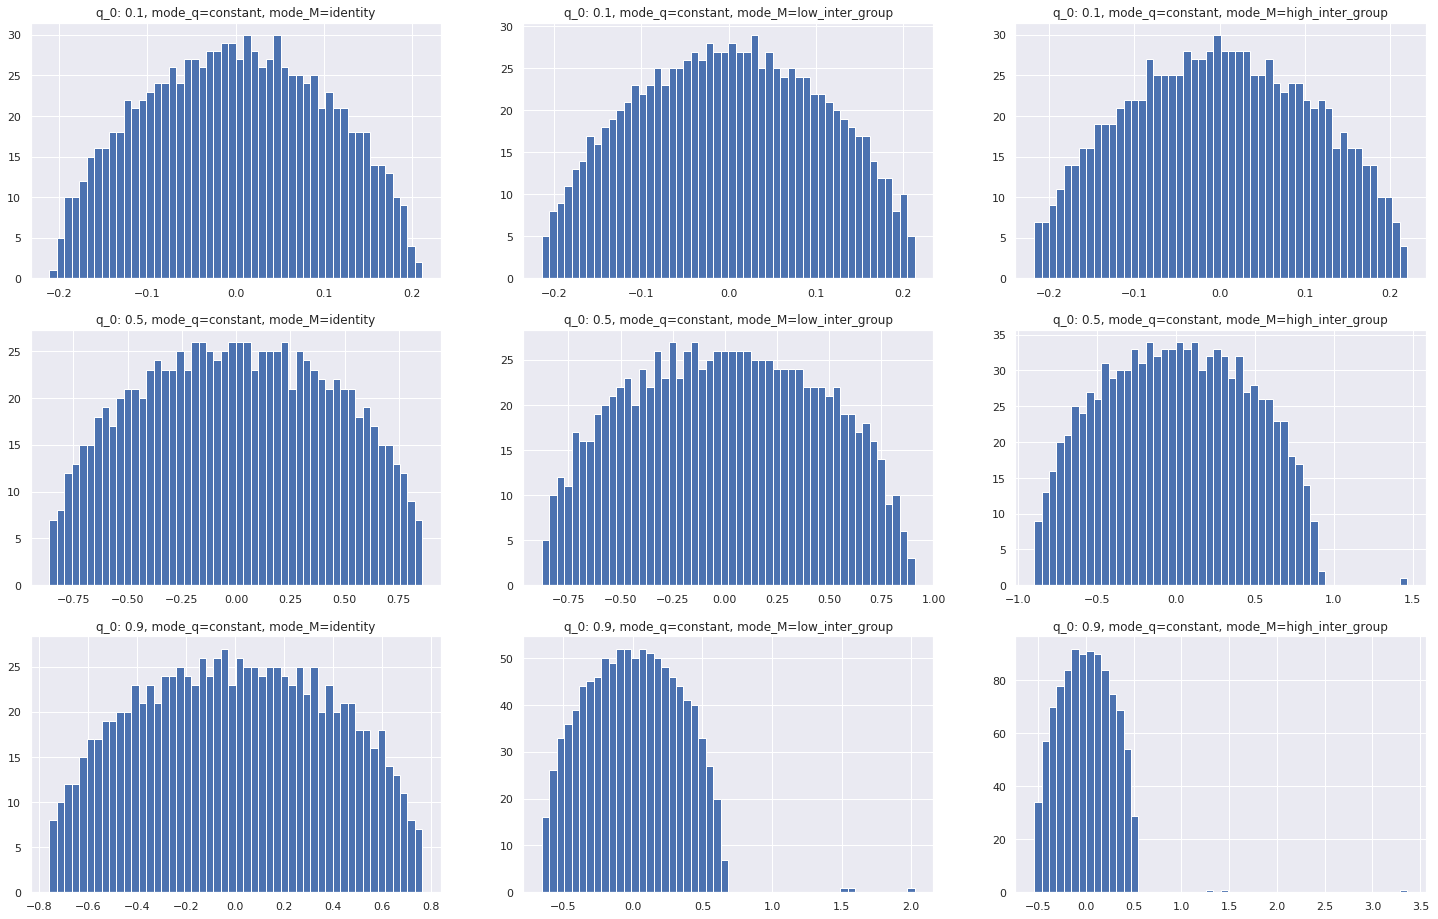

 33%|███▎      | 1/3 [01:51<03:43, 111.58s/it]

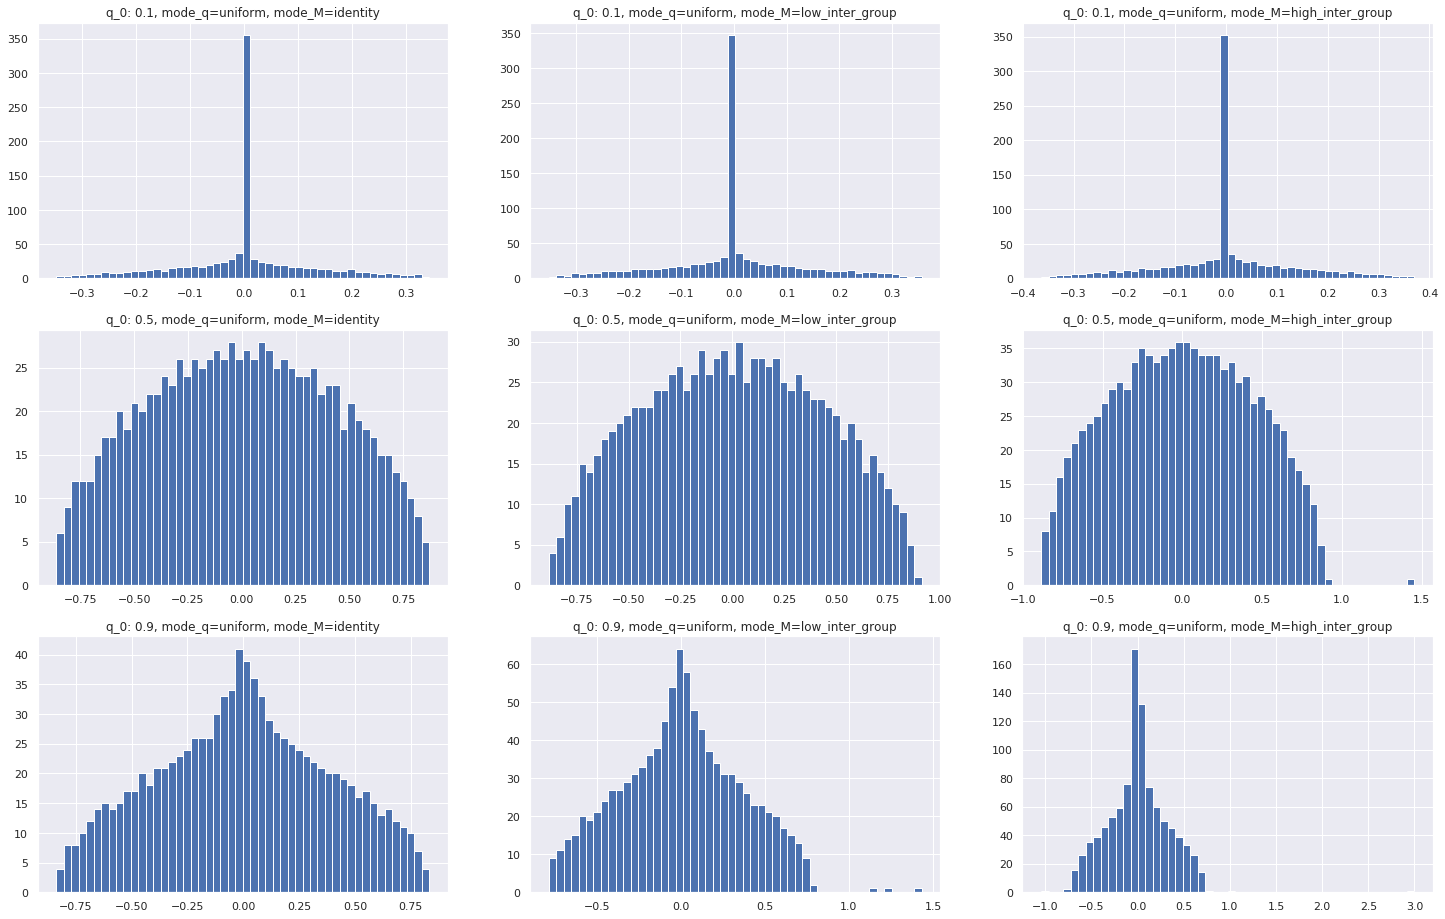

 67%|██████▋   | 2/3 [03:38<01:50, 110.15s/it]

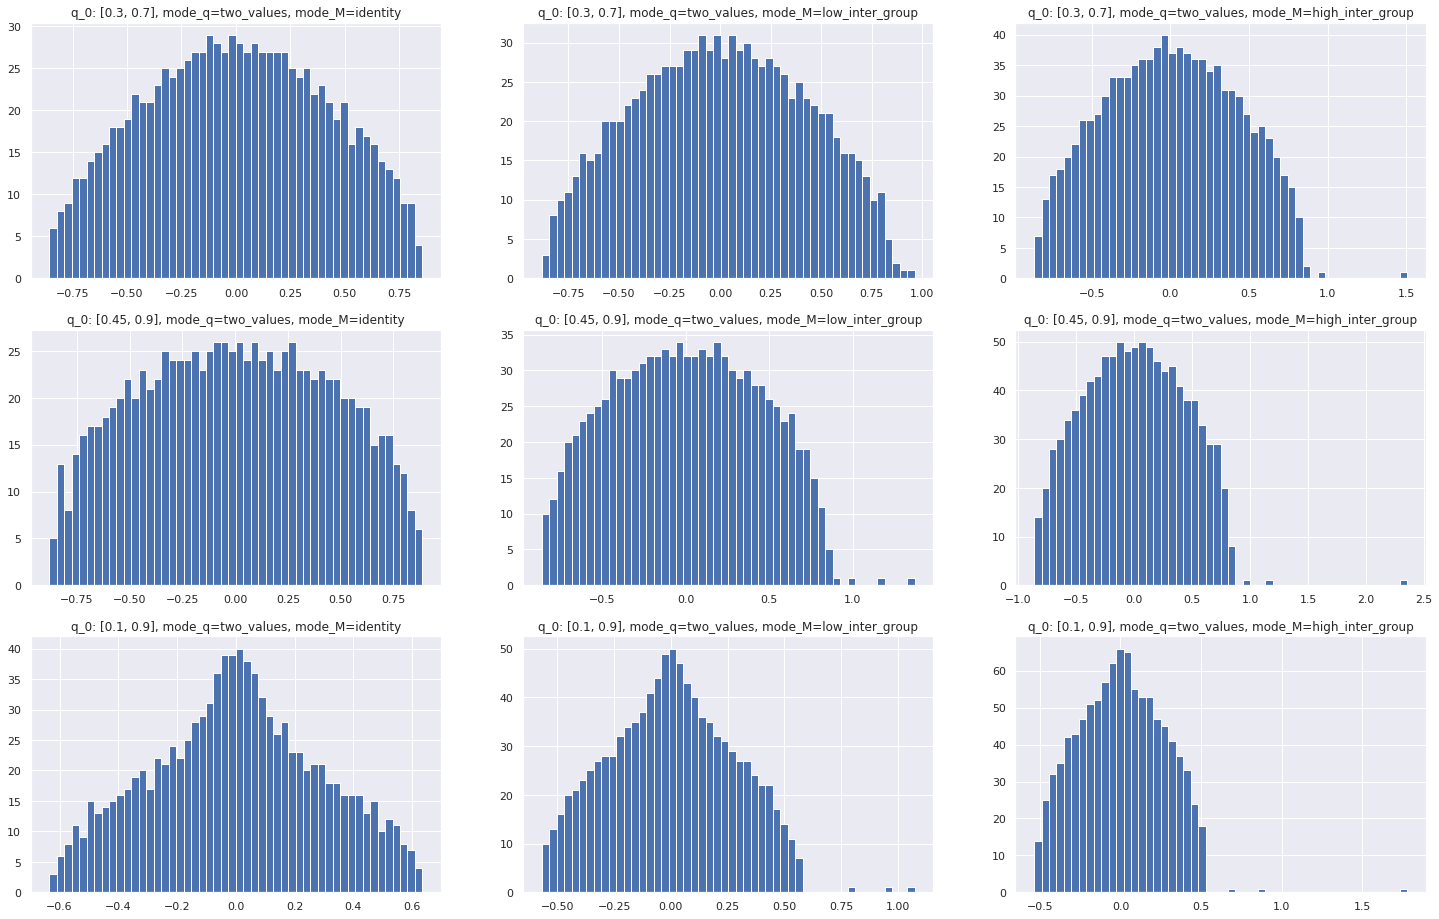

100%|██████████| 3/3 [05:27<00:00, 109.84s/it]


In [8]:
# Display the spectrum of B
displayDifferentMode()

## 1.2 - Représentation des vecteurs propres

In [86]:
def pointsCoordinates(B_2, J, n=1000, K=3):
    """Return an array with all the traces to draw in the 3D scatter plot."""
    
    # Initialisation of the saving array
    traces = []
    
    # Set of colors
    set_colors = ['rgba(217, 217, 217, 0.14)', 'rgba(155, 120, 64, 0.12)',
                  'rgba(89, 165, 127, 0.18)']
    
    # Compute the affectations
    x = [[] for i in range(3)]
    y = [[] for i in range(3)]
    z = [[] for i in range(3)]
    c = []

    for i in tqdm(range(n)):
        
        # Extract the associated class
        j = 0
        while j < K:
            
            if J[i, j] == 1:
                c_i = j
                break
                
            # Update j
            j += 1
                
        # Update class
        c.append(c_i)
        
        # Append x, y, z
        x[c_i].append(B_2[i, 0])
        y[c_i].append(B_2[i, 1])
        z[c_i].append(B_2[i, 2])
        
    for classe in range(3):
            
        # Extract the coordinates
        label_x = "eig. vector 1"
        x_c = x[classe]
        label_y = "eig. vector 2"
        y_c = y[classe]
        label_z = "eig. vector 3"
        z_c = z[classe]

        # Specifications for this trace
        trace = go.Scatter3d(
            x=x_c,
            y=y_c,
            z=z_c,
            name=classe,
            mode='markers',
            marker=dict(
                size=3,
                line=dict(
                    color=set_colors[classe],
                    width=0.55
                ),
                opacity=0.8
            )
        )
        
        # Update traces list
        traces.append(trace)
        
    return traces, label_x, label_y, label_z

In [89]:
def displayData(q_0=0.9, mode_q="constant", mode_m="low_inter_group", n=1000, K=3,
                name="Spectral_Clustering_Good"):
    """Display the q_i in according to the two first eigen vectors."""

    # Alternative
    q_0 = [0.1, 0.9]
    mode_q = "two_values"
    
    # Generate q
    q = generateQ(q_0=q_0, n=n, mode=mode_q)

    # Compute B
    B, J = computeB(q, mode_m=mode_m, return_J=True)

    # Initialisation of the PCA
    pca = PCA(n_components=3)
    
    # Transform B
    B_2 = pca.fit_transform(B)
        
    # Extract the 3D coordinates
    data, label_x, label_y, label_z = pointsCoordinates(B_2, J, n=n, K=K)

    # Definition of the layout
    layout = go.Layout(
        scene = dict(
            xaxis = dict(
                title=label_x),
            yaxis = dict(
                title=label_y),
            zaxis = dict(
                title=label_z),),
            width=700,
            margin=dict(
            r=0,
            b=0,
            l=0,
            t=0
            )
    )

    # Display the data
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='simple-3d-scatter')

In [90]:
displayData()

100%|██████████| 1000/1000 [00:00<00:00, 244679.97it/s]

(1000, 3)
(1000, 3)


# Exercice 2: Cas Homogène

## Question 2.2

In [93]:
def M(m_l=[1, 3, 7]):
    """Return a diagonal matrix with m_l on the diagonal."""
    
    return np.diag(m_l)

In [94]:
def estimateLambda(q_0, m_k, c_k):
    """Return the estimated extrem lambdas."""
    
    # prod
    prod = q_0 ** 3 * np.sqrt(1 - q_0 ** 2) * m_k * c_k
    
    return prod * (1 + 1 / (prod ** 2)) 

In [120]:
def mseEstimationExtremLambdas(q_0=0.5, n=1000, m_l=[10, 30, 50], K=3):
    """Compute the MSE between the extrem lambdas and the simulated ones"""
    
    # Generate q
    q = generateQ(q_0=q_0, n=n, mode="constant")

    # Compute M
    M_mat = M(m_l=m_l)
    
    # Compute C
    C = np.ones((K, K)) + M_mat / np.sqrt(n)
    
    # Compute J
    J, affectations = generateAffectations(n=n, K=K, return_affectations=True)
    
    # Extract n_k
    c_l = [list(affectations).count(k) for k in np.unique(affectations)]
    c_l = np.array(c_l) / n

    # Estimations of the lambdas
    estimationsLambdas_l = [estimateLambda(q_0, m_l[k], c_l[k]) for k in range(len(m_l))]
    
    # Compute p for the bernoulli law
    Jq = np.diagflat(q) @ J
    p = np.clip(Jq @ C @ Jq.T, 0, 1)
    
    # Initialisation of A
    A = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            
            # Update A
            p_ij = p[i, j]
            A[i, j] = np.random.choice([0, 1], p=[1 - p_ij, p_ij])
            A[j, i] = A[i, j]
    
    # Compute B
    B = 1 / np.sqrt(n) * (A - q @ q.T)

    # Compute the eigen values and extract the three most important one:
    eigvals = np.real(np.linalg.eigvals(B))
    
    # Extract the three most important one
    main_eigvals = eigvals[np.abs(eigvals).argsort()[-3:]]
    
    print(estimationsLambdas_l, main_eigvals)
    
    # Display spectrum
    fig, axs = plt.subplots(1, 1, figsize=(10, 8))
    displaySpectrum(B, axs, q_0, "constant", "diagonal")

[3.201852728975294, 2.0008446185209925, 2.4577742661499142] [1.06096649 2.48462586 4.51652266]


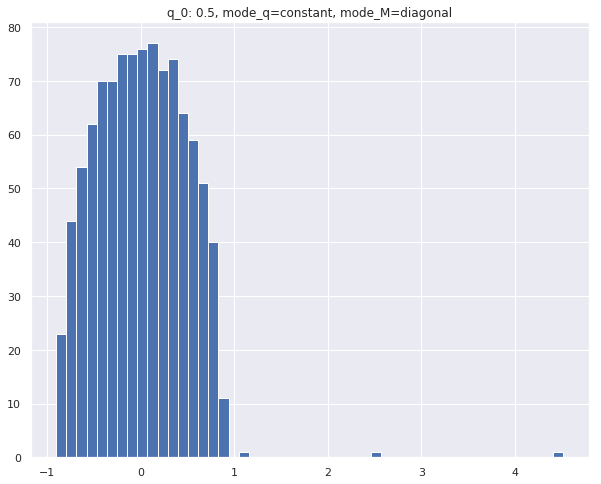

In [121]:
mseEstimationExtremLambdas()

## Question 2.4

In [ ]:
def alignement(a=1, q_0=0.9, n=10000, m_l=[1, 3, 7], K=3):
    """Check the alignment between j_a and the isolated eigen vectors."""
    
    # Generate q
    q = generateQ(q_0=q_0, n=n, mode="constant")

    # Compute M
    M_mat = M(m_l=m_l)
    
    # Compute C
    C = np.ones((K, K)) + M_mat / np.sqrt(n)
    
    # Compute J
    J, affectations = generateAffectations(n=n, K=K, return_affectations=True)
    
    # Extract n_k
    c_l = [list(affectations).count(k) for k in np.unique(affectations)]
    c_l = np.array(c_l) / n
    
    # Compute p for the bernoulli law
    Jq = np.diagflat(q) @ J
    p = np.clip(Jq @ C @ Jq.T, 0, 1)
    
    # Initialisation of A
    A = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            
            # Update A
            p_ij = p[i, j]
            A[i, j] = np.random.choice([0, 1], p=[1 - p_ij, p_ij])
            A[j, i] = A[i, j]
    
    # Compute B
    B = 1 / np.sqrt(n) * (A - q @ q.T)

    # Compute the eigen values and extract the three most important one:
    eigvals = np.real(np.linalg.eigvals(B))
    
    # Extract the three most important one
    main_eigvals = eigvals[np.abs(eigvals).argsort()[-3:]]    